(48000, 1)


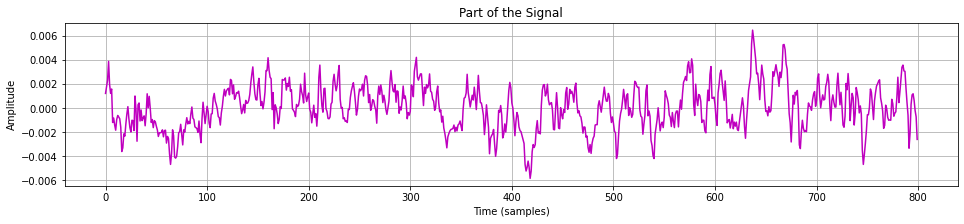

In [75]:
import soundfile
import numpy as np
import matplotlib.pyplot as plt

signal, samplerate = soundfile.read('test.wav')
noise_signal = signal.reshape((-1, 1))
N = noise_signal.shape[0]
print(noise_signal.shape)

fig, ax = plt.subplots(figsize=(16, 3))
ax.plot(noise_signal[10000: 10800], c="m")
ax.set_title("Part of the Signal")
ax.set_xlabel("Time (samples)")
ax.set_ylabel("Amplitude")
ax.grid(True)

In [118]:
from IPython.display import Audio
Audio(noise_signal[:, 0], rate=samplerate)

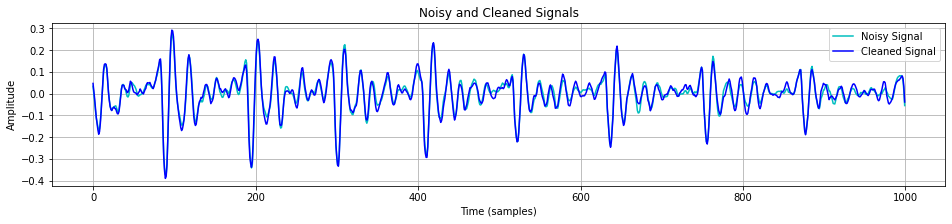

In [168]:
filter_order = 100
white_noise = 0.01 * np.random.randn(N + filter_order, 1)

weights = np.random.randn(filter_order, 1)
w_history = np.zeros((filter_order, N))
clean_signal = noise_signal.copy()
eta = 10

for i in range(N):
    x = white_noise[i: i + filter_order]
    estimated_noise = x.T @ weights
    error = estimated_noise[0, 0] - noise_signal[i, 0]
    weights -= eta * error * x
    w_history[:, i] = weights[:, 0]
    clean_signal[i, 0] = -error

fig, ax = plt.subplots(figsize=(16, 3))
ax.plot(noise_signal[22000:23000], c="c", label="Noisy Signal")
ax.plot(clean_signal[22000:23000], c="b", label="Cleaned Signal")
ax.set_title("Noisy and Cleaned Signals")
ax.set_xlabel("Time (samples)")
ax.set_ylabel("Amplitude")
ax.grid(True)
plt.legend()

[ 9.98259998e-04  1.08730897e-03  1.38455140e-03  4.52785383e-04
  1.19448784e-03  3.41490323e-03  1.38909143e-03  3.97156958e-03
  1.82132679e-03 -2.66741038e-04 -1.11408645e-03 -4.44904448e-03
 -2.01491569e-03 -6.26149463e-04 -3.38194968e-03 -9.11642398e-04
 -2.02030486e-04  1.41075681e-03  1.14116792e-03 -1.50089540e-03
  8.28855187e-04  1.89978245e-04  1.36322992e-03  2.47328545e-03
 -3.13832581e-04  1.28797940e-03  1.85241474e-03  1.18260987e-03
 -7.47796388e-04 -2.61386369e-04 -2.12104943e-03 -1.16556369e-03
  2.80193481e-04  8.60741711e-04  3.14083175e-03  1.36251228e-03
  1.41487414e-03  2.26135660e-03  3.26418111e-03  3.91438629e-03
  6.26818290e-03  5.37705913e-03  2.54644208e-03  1.69073605e-03
  2.32267765e-04  6.72698734e-04  1.52724161e-03  1.89433466e-03
  7.34085389e-04  2.03940503e-04  5.49353103e-04 -1.45831932e-03
  1.32876146e-03  1.43267677e-05 -2.63990392e-03 -2.41688565e-03
 -3.38159781e-03 -3.13965195e-03 -2.50085321e-03 -4.76866309e-03
 -2.46503630e-03 -3.47364

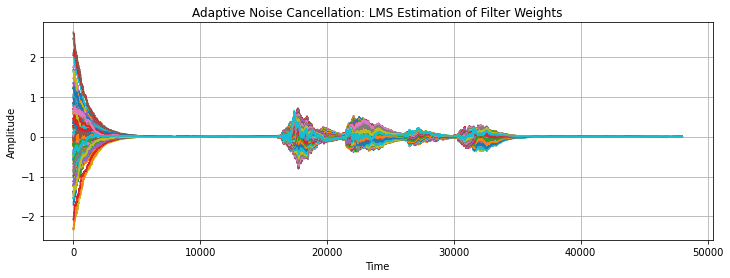

In [169]:
fig, ax = plt.subplots(figsize=(12, 4))
for j in range(filter_order):
    ax.plot(np.arange(N - 1), w_history[j, 0: N-1])
ax.grid(True)
ax.set_title("Adaptive Noise Cancellation: LMS Estimation of Filter Weights")
ax.set_xlabel("Time")
ax.set_ylabel("Amplitude")
print(w_history[:, -1])

In [166]:
Audio(clean_signal[10000:, 0], rate=samplerate)